# Part I

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
data = pd.read_csv("heart_data.csv")
# Remove missing values
data.dropna(inplace=True)

data.head()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1


In [69]:
X = data.drop('diagnosis', axis=1)
Y = data['diagnosis']
p = 13


In [70]:
import pymc as pm; import numpy as np

with pm.Model() as logistic_model:
    betas = pm.MvNormal('betas', mu=np.zeros(p), cov=np.eye(p), shape=p)
    lin = pm.math.dot(X, betas)
    p = pm.math.invlogit(lin) # Logit link function
    y = pm.Bernoulli('y', p=p, observed=Y)

with logistic_model:
    idata = pm.sample()

# Part II

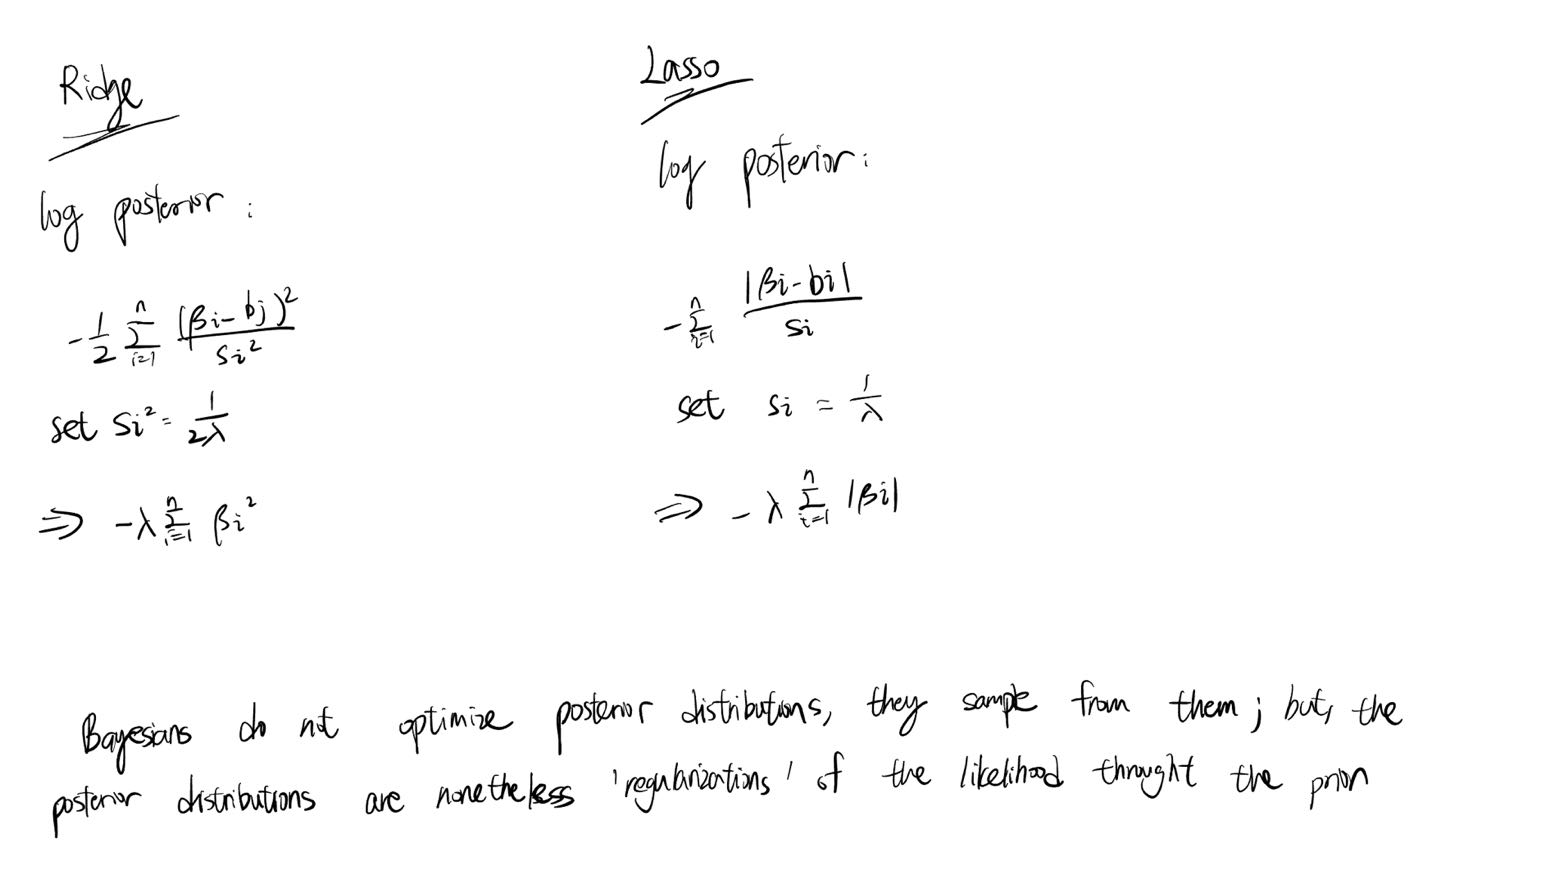